<a href="https://colab.research.google.com/github/DivyaSadanandan/AQI-Prediction/blob/main/Drug_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **OBJECTIVE : To build a classification model that classifies the side effect of a particular drug by age, gender and race.**

---



---



Step wise approach

1. Importing libraries and loading the dataset

2. Feature Description ----->
•	Listing the data head
•	Listing the tail of the dataset
•	Check the shape of the dataset
•	Checking the datatypes in the dataset
•	Checking the column wise unique values

3. Exploratory Data Analysis---->
•	Distribution of age in the dataset -bar graph
•	The top 20 drugs in the data set -bar graph.
•	Top 20 conditions that people faced -bar graph.
•	Top 20 the number of drugs per condition- bar graph
•	Grouping the drug ID based on the conditions treated and viz.
•	Distribution of effectiveness in the data set
•	Pie chart showing the distribution of satisfaction level
•	Count plot showing the distribution of sex
•	Word cloud showing the most occurring words in the review column
•	Word cloud for reviews with high satisfaction ratings
•	Word cloud for reviews with low satisfaction ratings


4. Data preprocessing---->
•	Checking missing values.
•	Dropping the rows with null values in reviews

5.	Performing sentiment analysis on the target reviews---->
•	Text preprocessing using TextBlob library- removing stop words, punctuations, convert into lower cases, lemmatize, spell check.
•	Generating positive and negative sentiments based on the polarity score obtained through VADER sentiment analysis

6. Encoding---->
•	Replacing the positive reviews with 1 and negative reviews with 0
•	Converting categorical data to numeric in the features with pandas factorize

7.	Splitting the data set into features and target

8.	Applying Standard scaler to features

9.	Splitting the data set into training and testing

10.	Creating the model

*   Decision Tree Classifier
*   Random Forest Classifier
*   XGBoost Classifier
*   Gradient Boosting Classifier
*   Gaussian Naive BAyes Classifier
*   Bernoulli Naive Bayes Classifier
*   K - Nearest Neighbor Classifier
*   Support Vector Machine Classifier


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Reading the file from the drive

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive'

MyDrive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks


In [ ]:
df=pd.read_csv('./webmd.csv')

In [ ]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [ ]:
df.tail()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


In [ ]:
df.shape

(362806, 12)

In [ ]:
df.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [ ]:
df.nunique()

Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250167
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

DATA PREPROCESSING

In [ ]:
#Checking missing values
df.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

There are 37 missing values in the reviews column. Let us remove the NaN values.

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

EXPLORATORY DATA ANALYSIS

In [ ]:
df['Age'].value_counts()

45-54         80032
55-64         75129
35-44         55010
25-34         49705
65-74         41215
19-24         24230
75 or over    15225
              12199
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

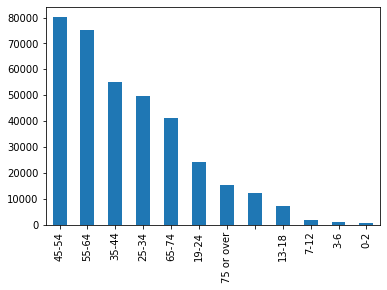

In [ ]:
#Check the distribution of age in the dataset
df['Age'].value_counts().head(15).plot(kind='bar')
plt.rcParams['figure.figsize'] = (10,7)
plt.show()

Majority of the users in the dataset falls under 25-65 age groups

Text(0.5, 1.0, 'Top 20 Drugs listed')

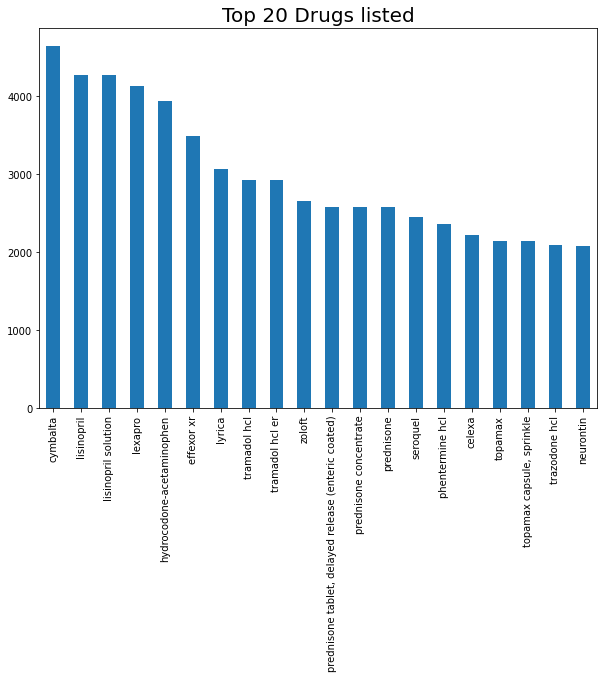

In [ ]:
# The top 50 drugs in the dataset

df['Drug'].value_counts().head(20).plot(kind='bar')
plt.rcParams['figure.figsize'] = (10,5)
plt.title("Top 20 Drugs listed", fontsize = 20)

Text(0.5, 1.0, 'The top 20 conditions that people faced')

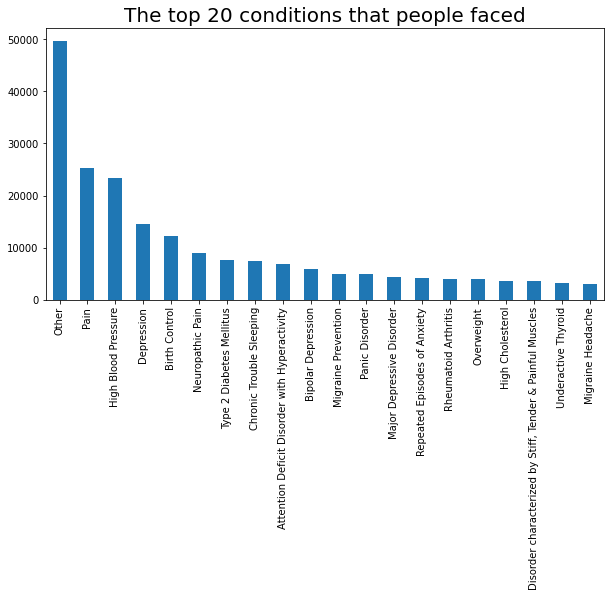

In [ ]:
# The top 30 conditions that people faced
df['Condition'].value_counts().head(20).plot(kind='bar')
plt.rcParams['figure.figsize'] = (15,6)
plt.title("The top 20 conditions that people faced",fontsize = 20)

The topmost condition is not listed. Or multiple conditions could be treated with several other drugs.


The length of the dataset is 362806 and there are 6572 unique drug ID's & 1806 conditions listed

---



Text(0.5, 1.0, 'Top 20 : The number of drugs per condition.')

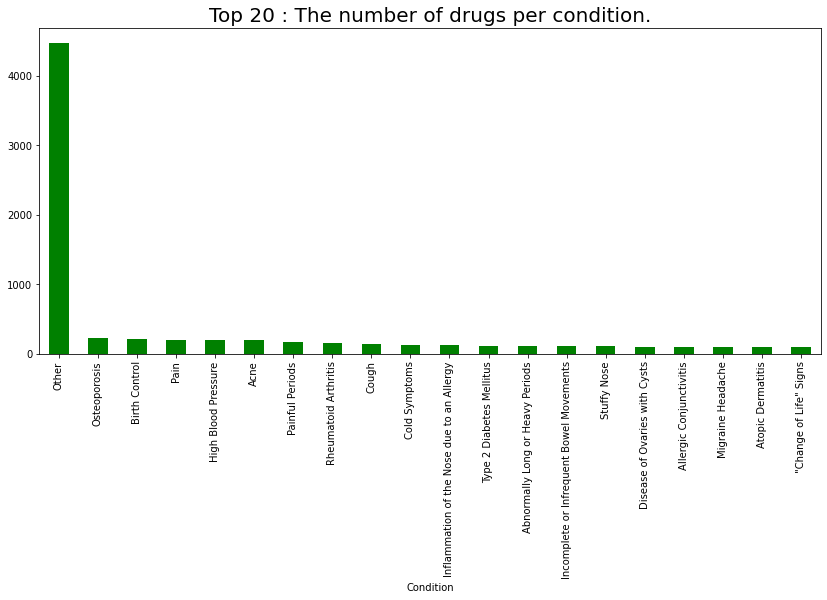

In [ ]:
condition_drug = df.groupby(['Condition'])['Drug'].nunique().sort_values(ascending=False)
condition_drug[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.title("Top 20 : The number of drugs per condition.", fontsize = 20)

We can group the drug ID based on the conditions treated and check if a single drug is prescribed for multiple conditions and viz.


In [ ]:
df.groupby('Drug')['Condition'].nunique().sort_values(ascending=False).head(20)

Drug
prednisone tablet, delayed release (enteric coated)                                92
prednisone concentrate                                                             92
prednisone                                                                         92
cipro suspension, microcapsule reconstituted                                       59
cipro                                                                              59
methylprednisolone                                                                 52
ciprofloxacin                                                                      48
levaquin                                                                           46
kenalog-40 vial                                                                    43
doxycycline hyclate tablet, delayed release (enteric coated) antimalarial drugs    41
doxycycline hyclate tablet tetracyclines                                           41
azithromycin tablet macrolide antibiotics        

We can see that a single drug is being used to treat multiple conditions. 

In [ ]:
df.groupby('Condition')['Drug'].nunique().sort_values(ascending=False).head(20)

Condition
Other                                         4469
Osteoporosis                                   229
Birth Control                                  204
Pain                                           202
High Blood Pressure                            200
Acne                                           197
Painful Periods                                161
Rheumatoid Arthritis                           148
Cough                                          137
Cold Symptoms                                  129
Inflammation of the Nose due to an Allergy     122
Type 2 Diabetes Mellitus                       117
Abnormally Long or Heavy Periods               111
Incomplete or Infrequent Bowel Movements       109
Stuffy Nose                                    108
Disease of Ovaries with Cysts                  103
Allergic Conjunctivitis                        102
Migraine Headache                               95
Atopic Dermatitis                               92
"Change of Life" Sign

Here we can also find that multiple drugs are being used to treat a certain condition.

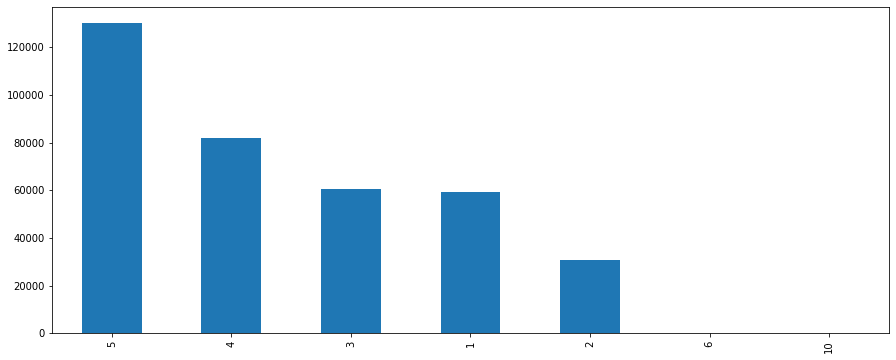

In [ ]:
# Distribution of effectiveness in the dataset 

df['Effectiveness'].value_counts().plot(kind='bar')
plt.show()

We can see that most of the drugs were effective from the effective rating distribution

In [ ]:
df['Satisfaction'].value_counts()

5     111537
1     100897
4      63149
3      51846
2      35337
6          2
10         1
Name: Satisfaction, dtype: int64

Satisfaction level ranges from 1-5. Hence 6 & 10  are outliers . 

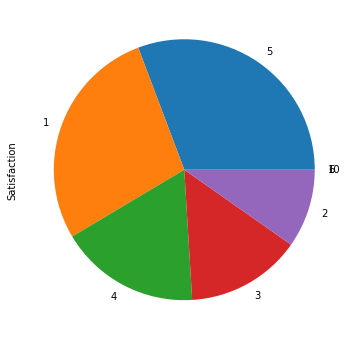

In [ ]:
df['Satisfaction'].value_counts().plot(kind='pie')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


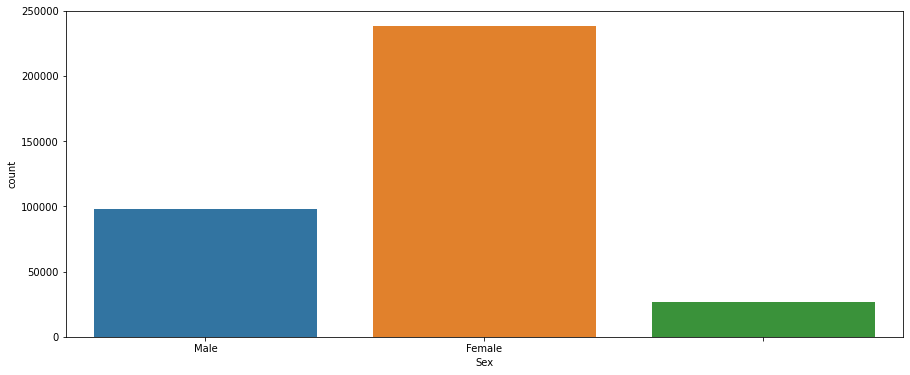

In [ ]:
sns.countplot(df["Sex"])
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
df['Sex'].value_counts()

Female    238203
Male       98033
           26533
Name: Sex, dtype: int64

Majority of the users were of female gender in the dataset.
Unspecified gender field is also observed.

#  Text Preprocessing

For Text Preprocessing we will use TextBlob Library. 
In Text Preprocessing we remove stop words, punctuations, convert into lower cases, lemmatize,spell check 

TextBlob is built upon NLTK and provides an easy to use interface to the NLTK library.
various tasks can be performed like part-of-speech tagging, noun phrase extraction, sentiment analysis, 
classification, translation, and more.

In [ ]:
! pip install textblob

In [ ]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations

df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

In [ ]:
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]', "")
df.Reviews.head(5)

0    im a retired physician and of all the meds i h...
1    cleared me right up even with my throat hurtin...
2    why did my ptinr go from a normal of 25 to ove...
3                          falling and dont realise it
4    my grandfather was prescribed this medication ...
Name: Reviews, dtype: object

In [ ]:
#Removing the stopwords
stop = stopwords.words('english')
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Reviews.head()

0    im retired physician meds tried allergies seas...
1    cleared right even throat hurting went away ta...
2                               ptinr go normal 25 100
3                                 falling dont realise
4    grandfather prescribed medication coumadin ass...
Name: Reviews, dtype: object

In [ ]:
#Lemmatization
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join([Word(word).
lemmatize() for word in x.split()]))
df.Reviews.head()

0    im retired physician med tried allergy seasona...
1    cleared right even throat hurting went away ta...
2                               ptinr go normal 25 100
3                                 falling dont realise
4    grandfather prescribed medication coumadin ass...
Name: Reviews, dtype: object

# WORDCLOUD

A Wordcloud (or Tag cloud) is a visual representation of text data.
It displays a list of words, the importance of each being shown with font size or colorm. 
This format is useful for quickly perceiving the most prominent term

In [ ]:
! pip install wordcloud

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

Make the Wordcloud for Reviews and for that a little more analysis and exploration is 
required.

In [ ]:
# Creating a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df
# Dropping null values
reviews.dropna(inplace=True)

In [ ]:
score_1 = reviews[reviews['Satisfaction'] == 1]
score_2 = reviews[reviews['Satisfaction'] == 2]
score_3 = reviews[reviews['Satisfaction'] == 3]
score_4 = reviews[reviews['Satisfaction'] == 4]
score_5 = reviews[reviews['Satisfaction'] == 5]

In [ ]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

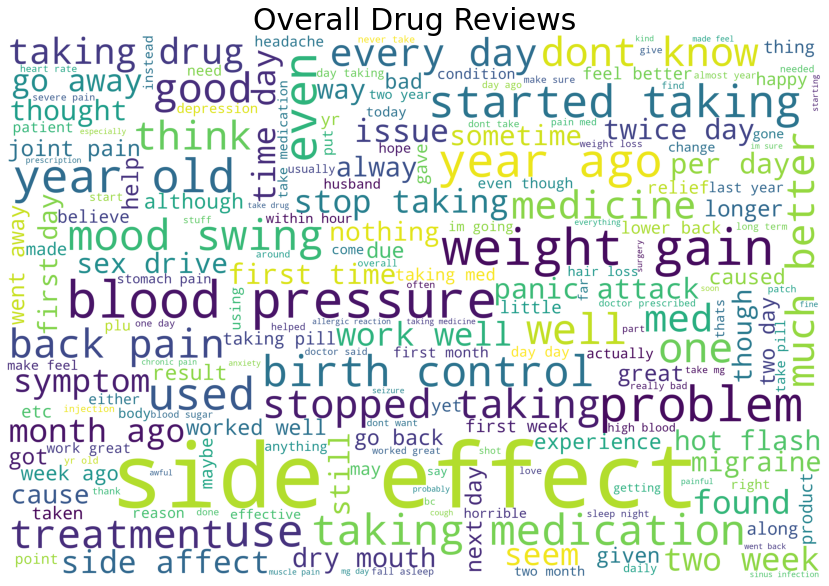

In [ ]:
# Wordcloud function's input needs to be a single string of text.
# Therefore, concatenating all reviews into a single string.

reviews_str = reviews_sample.Reviews.str.cat()
wordcloud = WordCloud(background_color='white',height=2000,width=3000).generate(reviews_str)
plt.rcParams['figure.figsize'] = (25,10)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Overall Drug Reviews",fontsize=30,color='black')
plt.show()

From this word cloud we understand that the most prominent word is 'Side effect'. Hence we can infer that the reviews speaks about the 'side effects'

In [ ]:
# Now let's split the data into Negative (when the Satisfaction rating is 1 or 2) and Positive (4 or #5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Satisfaction'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Satisfaction'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.Reviews.str.cat()
positive_reviews_str = positive_reviews.Reviews.str.cat()

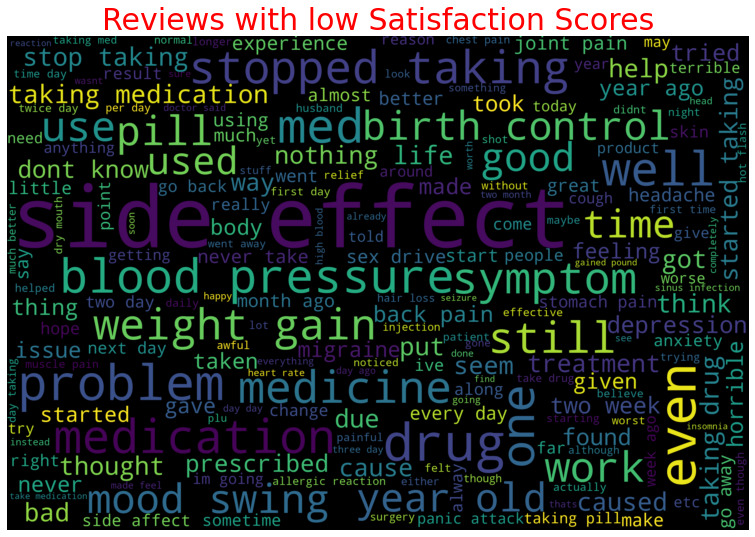

In [ ]:
wordcloud_negative = WordCloud(background_color='black',height=2000,width=3000).generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='grey',height=2000,width=3000).generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(212)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with low Satisfaction Scores',fontsize=30,color='red')
plt.show()

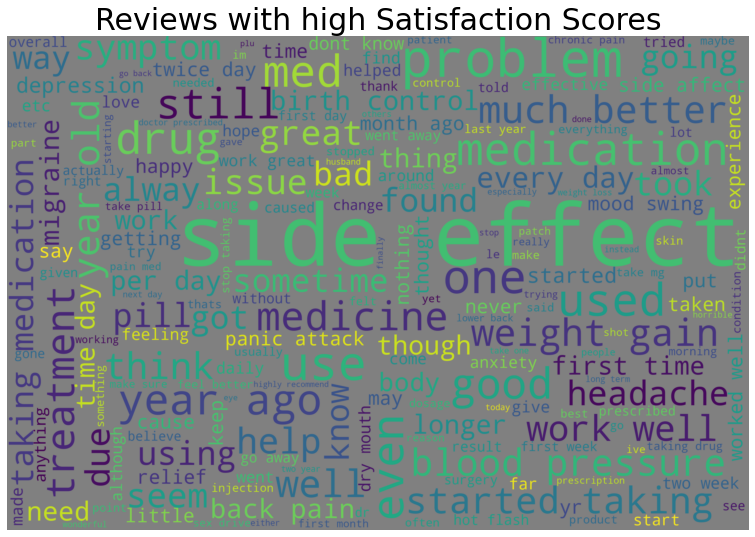

In [ ]:
fig = plt.figure(figsize=(20,20))
ax2 = fig.add_subplot(211)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with high Satisfaction Scores',fontsize=30)
plt.show()


SENTIMENT ANALYSIS

VADER Sentiment Analysis. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.
 VADER uses a combination of 
A sentiment lexicon is a list of lexical features (e.g., words) which are generally
labeled according to their semantic orientation as either positive or negative. 
VADER not only tells about the Positive and Negative score
but also tells us about how positive or negative a sentiment is.

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 5.7MB/s 


In [ ]:
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Reviews']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.124,0.734,0.142,0.1027
1,0.243,0.631,0.126,-0.3182
2,0.000,1.000,0.000,0.0000
3,0.444,0.556,0.000,-0.1531
4,0.086,0.771,0.143,0.3818


In [ ]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,neg,neu,pos,compound
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,im retired physician med tried allergy seasona...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,0.124,0.734,0.142,0.1027
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared right even throat hurting went away ta...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,0.243,0.631,0.126,-0.3182
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,ptinr go normal 25 100,3,Female,,0,0.000,1.000,0.000,0.0000


In [ ]:
# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,neg,neu,pos,compound,Sentiment
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,im retired physician med tried allergy seasona...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,0.124,0.734,0.142,0.1027,Positive
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared right even throat hurting went away ta...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,0.243,0.631,0.126,-0.3182,Negative
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,ptinr go normal 25 100,3,Female,,0,0.000,1.000,0.000,0.0000,Positive
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,falling dont realise,1,Female,,0,0.444,0.556,0.000,-0.1531,Negative
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,grandfather prescribed medication coumadin ass...,1,Male,,1,0.086,0.771,0.143,0.3818,Positive


# Results

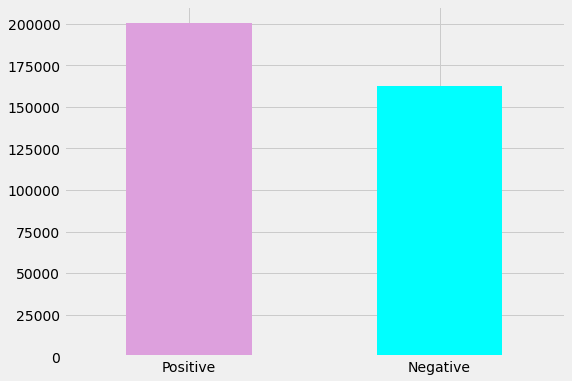

In [ ]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', figsize = (8,6), rot=0, color=['plum','cyan']);

In [ ]:
df_c['Sentiment'].value_counts()

Positive    200428
Negative    162341
Name: Sentiment, dtype: int64

We can see that there are 200428 positive reviews & 162341 negative reviews. The positive reviews could be possibly given by users who might not have had any side effects & negative sentiments could be given by users who might have experienced side effects/difficulties with the drug.

In [ ]:
df_c.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,neg,neu,pos,compound,Sentiment
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,im retired physician med tried allergy seasona...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,0.124,0.734,0.142,0.1027,Positive
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared right even throat hurting went away ta...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,0.243,0.631,0.126,-0.3182,Negative
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,ptinr go normal 25 100,3,Female,,0,0.000,1.000,0.000,0.0000,Positive
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,falling dont realise,1,Female,,0,0.444,0.556,0.000,-0.1531,Negative
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,grandfather prescribed medication coumadin ass...,1,Male,,1,0.086,0.771,0.143,0.3818,Positive


ENCODING

Replacing the positive reviews with 1 and negative reviews with 0

In [ ]:
df_c.Sentiment = df_c.Sentiment.replace({'Positive':1,'Negative':0})

df_c.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,neg,neu,pos,compound,Sentiment
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,im retired physician med tried allergy seasona...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,0.124,0.734,0.142,0.1027,1
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared right even throat hurting went away ta...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,0.243,0.631,0.126,-0.3182,0
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,ptinr go normal 25 100,3,Female,,0,0.000,1.000,0.000,0.0000,1
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,falling dont realise,1,Female,,0,0.444,0.556,0.000,-0.1531,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,grandfather prescribed medication coumadin ass...,1,Male,,1,0.086,0.771,0.143,0.3818,1


In [ ]:
# Converting categorical data to numeric in the features with pandas factorize

cols = ['Age', 'Condition', 'Drug', 'Sex']
for x in cols:
  df_c[x] = pd.factorize(df_c[x])[0]

In [ ]:
df_c.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'neg', 'neu', 'pos', 'compound', 'Sentiment'],
      dtype='object')

In [ ]:
df_c=df_c.drop(['Date','DrugId', 'Reviews','Sides','neg', 'neu', 'pos', 'compound'],axis=1)

In [ ]:
df_c.head()

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,Sentiment
0,0,0,0,5,5,5,0,0,1
1,1,1,0,5,5,5,1,1,0
2,2,2,1,2,3,3,1,0,1
3,0,2,1,2,2,1,1,0,0
4,3,2,1,1,1,1,0,1,1


Since we have encoded the categorical features ,we could also plot the heat map to check if there is any strong correlation exists between the features and the target 'Reviews'

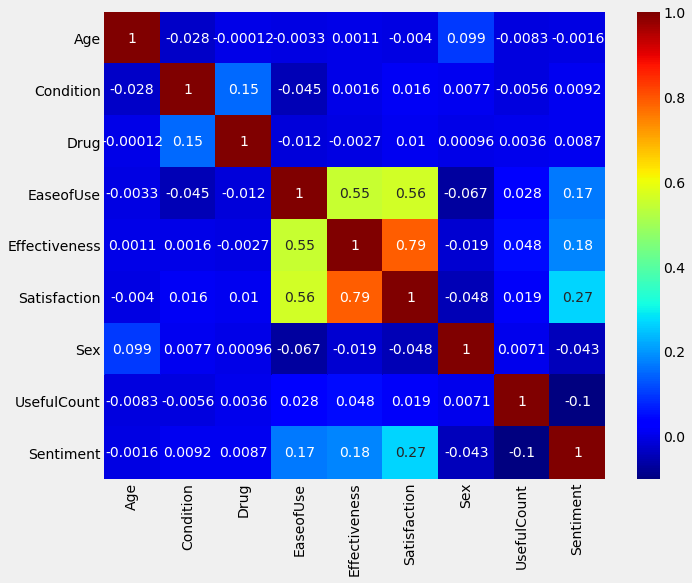

In [ ]:
corr = df_c.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'jet')

Here we could see that Effectiveness has a strong positive correlation with the Satisfaction.

SPLITTING THE DATASET INTO FEATURES AND TARGET

In [ ]:
X=df_c.drop(['Sentiment'],axis=1)
y=df_c['Sentiment']

In [ ]:
X.describe()

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
count,362769.000000,362769.000000,362769.000000,362769.000000,362769.000000,362769.000000,362769.000000,362769.000000
mean,3.622024,241.681384,3101.093991,4.019839,3.532060,3.135362,0.802905,6.745546
std,1.935156,303.777516,2107.999017,1.317727,1.455974,1.611122,0.551842,9.324502
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,35.000000,1220.000000,3.000000,3.000000,1.000000,0.000000,1.000000
50%,4.000000,131.000000,3027.000000,5.000000,4.000000,3.000000,1.000000,4.000000
75%,5.000000,295.000000,4829.000000,5.000000,5.000000,5.000000,1.000000,9.000000
max,11.000000,1804.000000,7092.000000,10.000000,10.000000,10.000000,2.000000,255.000000


In [ ]:
#Applying Standard Scaler to the features
from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7
count,3.627690e+05,3.627690e+05,3.627690e+05,3.627690e+05,3.627690e+05,3.627690e+05,3.627690e+05,3.627690e+05
mean,6.688582e-15,7.261534e-14,-8.332813e-14,8.814549e-16,-7.796846e-15,-1.479807e-14,-3.153879e-14,-4.506013e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.871698e+00,-7.955879e-01,-1.471110e+00,-2.291706e+00,-1.739086e+00,-1.325390e+00,-1.454956e+00,-7.234226e-01
25%,-8.381886e-01,-6.803718e-01,-8.923612e-01,-7.739390e-01,-3.654331e-01,-1.325390e+00,-1.454956e+00,-6.161781e-01
50%,1.953209e-01,-3.643507e-01,-3.514902e-02,7.438279e-01,3.213933e-01,-8.401710e-02,3.571589e-01,-2.944446e-01
75%,7.120757e-01,1.755189e-01,8.196913e-01,7.438279e-01,1.008220e+00,1.157355e+00,3.571589e-01,2.417777e-01
max,3.812605e+00,5.142977e+00,1.893223e+00,4.538245e+00,4.442352e+00,4.260787e+00,2.169273e+00,2.662392e+01


SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
X.shape,X_train.shape, X_test.shape

((362769, 8), (290215, 8), (72554, 8))

MODELS

We can now use multiple Machine Algorithms to see which gives the best performance

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

(1)Decision Tree

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
%time dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y_pred))
print("Score:",round(accuracy_score(y_test,y_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_pred))

CPU times: user 1.77 s, sys: 10.5 ms, total: 1.78 s
Wall time: 1.78 s
Confusion Matrix for Decision Tree:
[[21191 11372]
 [11905 28086]]
Score: 67.92
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.65     32563
           1       0.71      0.70      0.71     39991

    accuracy                           0.68     72554
   macro avg       0.68      0.68      0.68     72554
weighted avg       0.68      0.68      0.68     72554




(2). Random Forest Classifier

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
%time rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,y_pred))
print("Score:",round(accuracy_score(y_test,y_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_pred))

CPU times: user 47.3 s, sys: 2.87 s, total: 50.2 s
Wall time: 50.1 s
Confusion Matrix for Random Forest Classifier:
[[21689 10874]
 [ 9511 30480]]
Score: 71.9
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.68     32563
           1       0.74      0.76      0.75     39991

    accuracy                           0.72     72554
   macro avg       0.72      0.71      0.71     72554
weighted avg       0.72      0.72      0.72     72554



(3) XGBoost Classifier

In [ ]:
# XGBoost Classifier
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
%time xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

print("Confusion Matrix for XGBoost Classifier:")
print(confusion_matrix(y_test,y_pred))
print("Score:",round(accuracy_score(y_test,y_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_pred))

CPU times: user 13.7 s, sys: 122 ms, total: 13.9 s
Wall time: 13.9 s
Confusion Matrix for XGBoost Classifier:
[[16884 15679]
 [ 9400 30591]]
Score: 65.43
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.52      0.57     32563
           1       0.66      0.76      0.71     39991

    accuracy                           0.65     72554
   macro avg       0.65      0.64      0.64     72554
weighted avg       0.65      0.65      0.65     72554



(4) Gradient Boosting Classifier

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
%time gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

print("Confusion Matrix for Gradient Boosting Classifier:")
print("Score:",round(accuracy_score(y_test,y_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_pred))

CPU times: user 37.7 s, sys: 129 ms, total: 37.9 s
Wall time: 37.8 s
Confusion Matrix for Gradient Boosting Classifier:
Score: 65.49
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.52      0.58     32563
           1       0.66      0.76      0.71     39991

    accuracy                           0.65     72554
   macro avg       0.65      0.64      0.64     72554
weighted avg       0.65      0.65      0.65     72554



(5)Gaussian Naive BAyes

In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
%time classifier.fit(X_train,y_train)
#Prediction of the test set result:
y_pred=classifier.predict(X_test)


print("Confusion Matrix for Gaussian Naive Bayes Classifier:")
print(confusion_matrix(y_test,y_pred))
print("Score:",round(accuracy_score(y_test,y_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_pred))


CPU times: user 71.6 ms, sys: 940 µs, total: 72.5 ms
Wall time: 74.6 ms
Confusion Matrix for Gaussian Naive Bayes Classifier:
[[15240 17323]
 [ 9923 30068]]
Score: 62.45
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.47      0.53     32563
           1       0.63      0.75      0.69     39991

    accuracy                           0.62     72554
   macro avg       0.62      0.61      0.61     72554
weighted avg       0.62      0.62      0.62     72554



(6). Bernoulli Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier= BernoulliNB()
%time classifier.fit(X_train,y_train)
#Prediction of the test set result:
y_pred=classifier.predict(X_test)

print("Confusion Matrix for Bernoulli Naive Bayes Classifier:")
print(confusion_matrix(y_test,y_pred))
print("Score:",round(accuracy_score(y_test,y_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_pred))

Confusion Matrix for Gaussian Naive Bayes Classifier:
[[18712 13851]
 [14394 25597]]
Score: 61.07
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57     32563
           1       0.65      0.64      0.64     39991

    accuracy                           0.61     72554
   macro avg       0.61      0.61      0.61     72554
weighted avg       0.61      0.61      0.61     72554



(7). K - Nearest Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_values =[]
neighbors= np.arange(2,12)
for k in neighbors:
   classifier = KNeighborsClassifier(n_neighbors= k, metric='minkowski')
   classifier.fit(X_train, y_train)
   y_pred= classifier.predict(X_test)
   acc= accuracy_score(y_test,y_pred)
   acc_values.append(acc)
acc_values

[0.6457259420569507,
 0.6613143313945475,
 0.6420597072525291,
 0.6516525622295118,
 0.6393307054056289,
 0.6464013010998705,
 0.6382969925848334,
 0.6442511784326157,
 0.6388069575764258,
 0.643327728312705]

Text(0, 0.5, 'Accuracy')

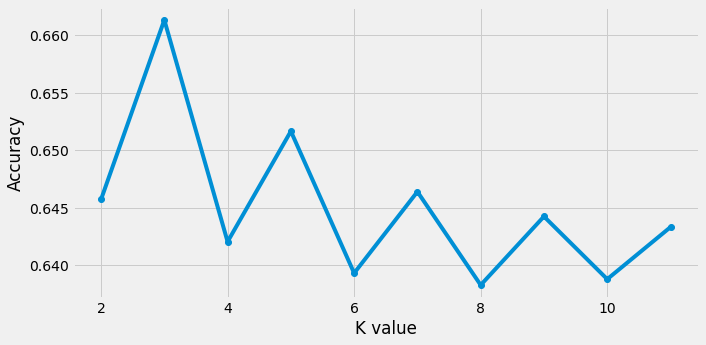

In [ ]:
plt.plot(neighbors,acc_values, 'o-')
plt.rcParams['figure.figsize'] = (7,5)
plt.xlabel('K value')
plt.ylabel('Accuracy')

In [ ]:
# Keeping K value as 3
classifier = KNeighborsClassifier(n_neighbors= 3, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,y_pred))
print("Score:",round(accuracy_score(y_test,y_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_pred))


Confusion Matrix for K Neighbors Classifier:
[[19715 12848]
 [11725 28266]]
Score: 66.13
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62     32563
           1       0.69      0.71      0.70     39991

    accuracy                           0.66     72554
   macro avg       0.66      0.66      0.66     72554
weighted avg       0.66      0.66      0.66     72554



(8). Support Vector Machines

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
%time svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,y_pred))
print("Score:",round(accuracy_score(y_test,y_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_pred))

CPU times: user 4h 58min 36s, sys: 39.4 s, total: 4h 59min 15s
Wall time: 4h 57min 54s
Confusion Matrix for Support Vector Machines:
[[15346 17217]
 [ 8529 31462]]
Score: 64.51
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.47      0.54     32563
           1       0.65      0.79      0.71     39991

    accuracy                           0.65     72554
   macro avg       0.64      0.63      0.63     72554
weighted avg       0.64      0.65      0.64     72554

